In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import pandas as pd

import time

from math import *

In [2]:
dfnh = pd.read_table("data/fnh.dat", header=None, sep='\s+')
fnh=dfnh.as_matrix(columns=dfnh.columns[2:]).T[0]
dfsh = pd.read_table("data/fsh.dat", header=None, sep='\s+')
fsh=dfsh.as_matrix(columns=dfsh.columns[2:]).T[0]
t1=dfnh.as_matrix(columns=dfnh.columns[0:]).T[0]
t2=dfsh.as_matrix(columns=dfsh.columns[0:]).T[0]

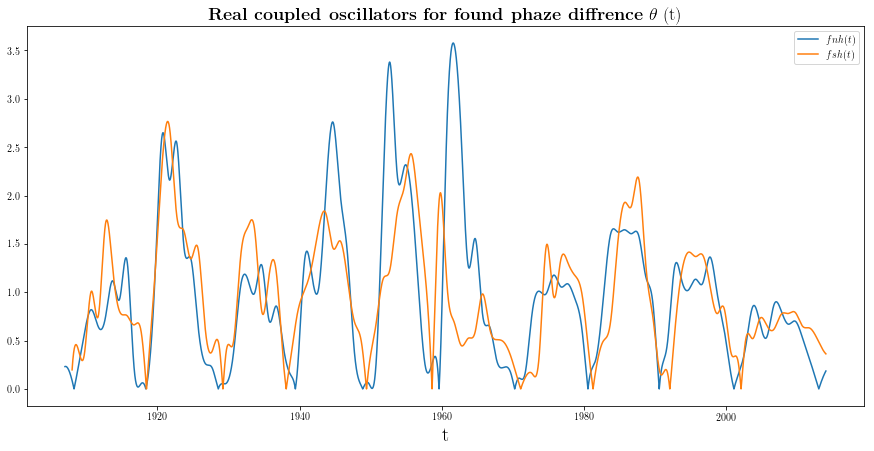

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t1, fnh, label='$fnh(t)$')
plt.plot(t2, fsh, label='$fsh(t)$')
plt.legend()
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Real coupled oscillators for found phaze diffrence} $\theta$ (t)', fontsize=18)
plt.show()

In [4]:
t=t2
fnh=fnh[366:]

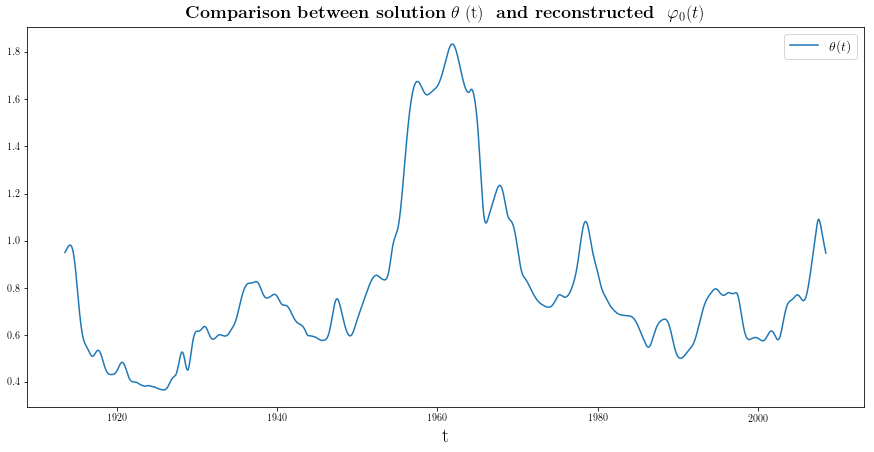

In [5]:
N_grid=t.shape[0]
p=365*11+2
h=t[1]-t[0]

dw=0.2

st=int(p/2)
fn=N_grid-1-st

C_0=[0]*N_grid

for i in range(N_grid):
    if (i-p/2>=0) and (i+p/2<=N_grid):
        C_0[i]=np.corrcoef(fnh[i-int(p/2):i+int(p/2)], fsh[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan
        
theta=np.arccos(C_0)
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, theta, '-')
plt.legend([r'$\theta(t)$', r'$\varphi_0(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between solution} $\theta$ (t) \textbf{ and reconstructed } $\varphi_0(t)$', fontsize=18)
plt.show()

In [6]:
theta=theta[st+1:fn-1]
t=t[st+1:fn-1]

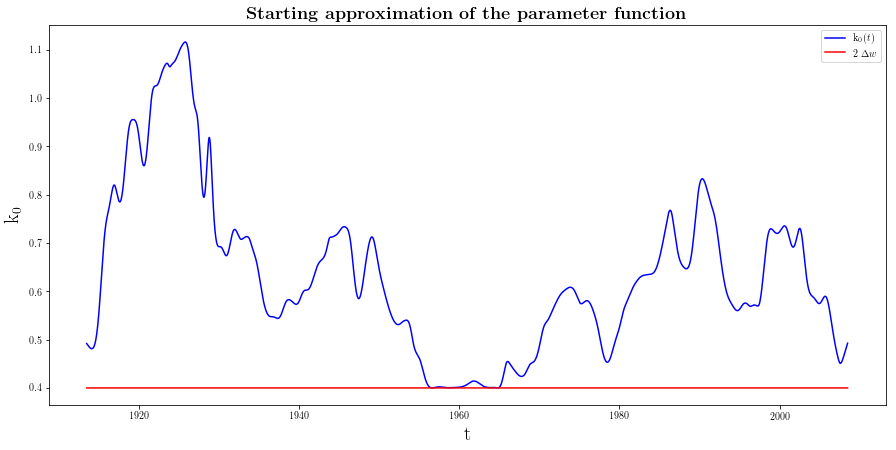

In [7]:
N_grid=t.shape[0]

dtheta=np.divide(np.diff(theta), np.diff(t))
dtheta=np.append(dtheta[0], dtheta)
k0=np.divide(2*dw, np.sin(theta))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
#plt.ylim((min(k_0)-0.05, max(k_0)))
plt.plot(t, k0, 'b')
plt.plot(t, [2*dw]*(N_grid), 'r')
#plt.plot(t, [(2*dw+sigma*move)]*(N_grid+wait_time), 'k--')
#plt.plot((wait_time/p, wait_time/p), (min(k0_t)-0.05, max(k0_t)), 'g-')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
#plt.savefig('k0_try.eps', format='eps', dpi=1000)
plt.show()

In [8]:
from scipy.optimize import curve_fit

In [9]:
def func(t, a, w, c, phi):
    return a * np.sin(w * (t-1908) + phi) + c

popt, pcov = curve_fit(func, t[0:365*22], k0[0:365*22], maxfev=100000)

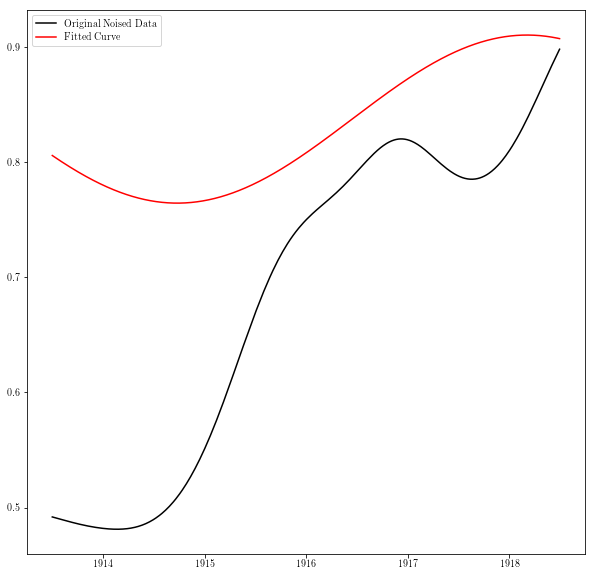

In [10]:
plt.figure(figsize=(10,10))
plt.plot(t[0:365*5], k0[0:365*5], 'k-', label="Original Noised Data")
plt.plot(t[0:365*5], func(t[0:365*5], *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [11]:
popt[0:3]

array([-0.07297282,  0.91233457,  0.83735705])

In [22]:
t.shape[0]/(365*15)

6.337534246575342

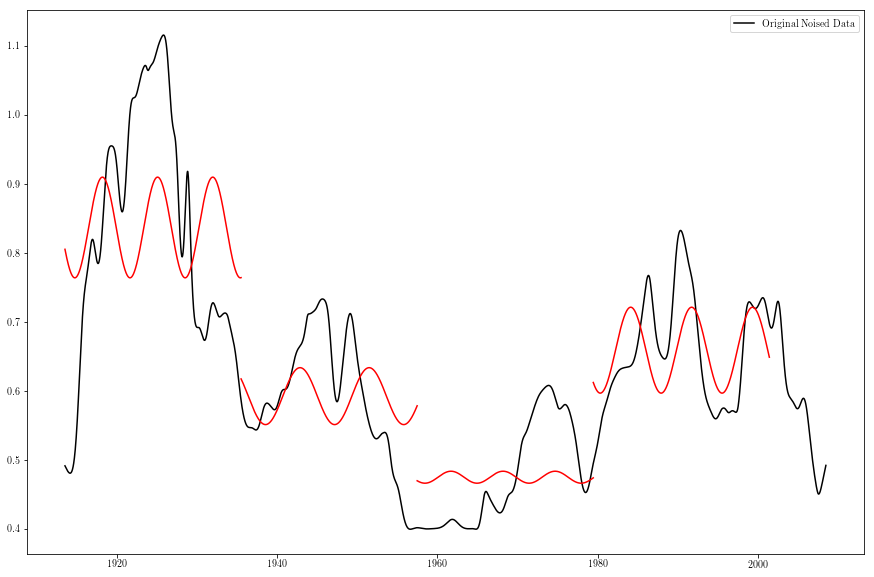

In [13]:
a_s=[]
w_s=[]
c_s=[]

plt.figure(figsize=(15,10))
plt.plot(t, k0, 'k-', label="Original Noised Data")
for i in range(4):
    popt, pcov = curve_fit(func, t[365*22*i:365*22*(i+1)], k0[365*22*i:365*22*(i+1)], maxfev=100000)
    plt.plot(t[365*22*i:365*22*(i+1)], func(t[365*22*i:365*22*(i+1)], *popt), 'r-')
    a_s.append(popt[0])
    w_s.append(popt[1])
    c_s.append(popt[2])
plt.legend()
plt.show()

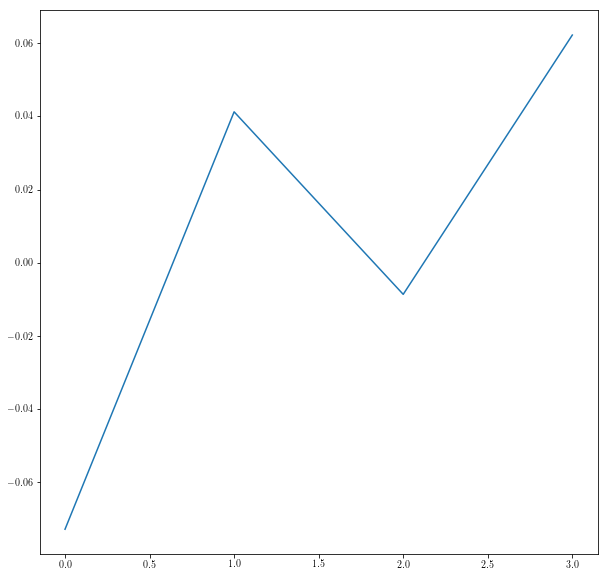

In [14]:
plt.figure(figsize=(10,10))
plt.plot(a_s)
plt.show()

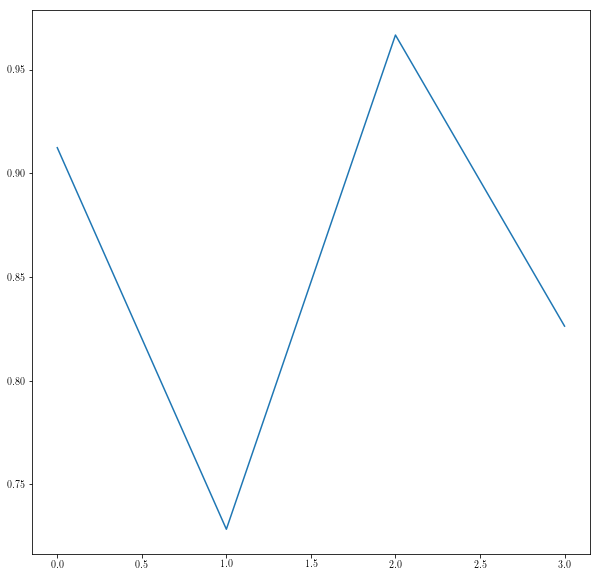

In [15]:
plt.figure(figsize=(10,10))
plt.plot(w_s)
plt.show()

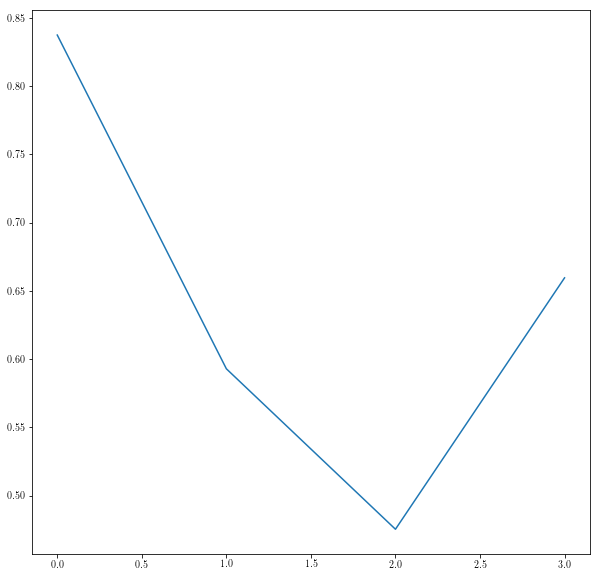

In [16]:
plt.figure(figsize=(10,10))
plt.plot(c_s)
plt.show()

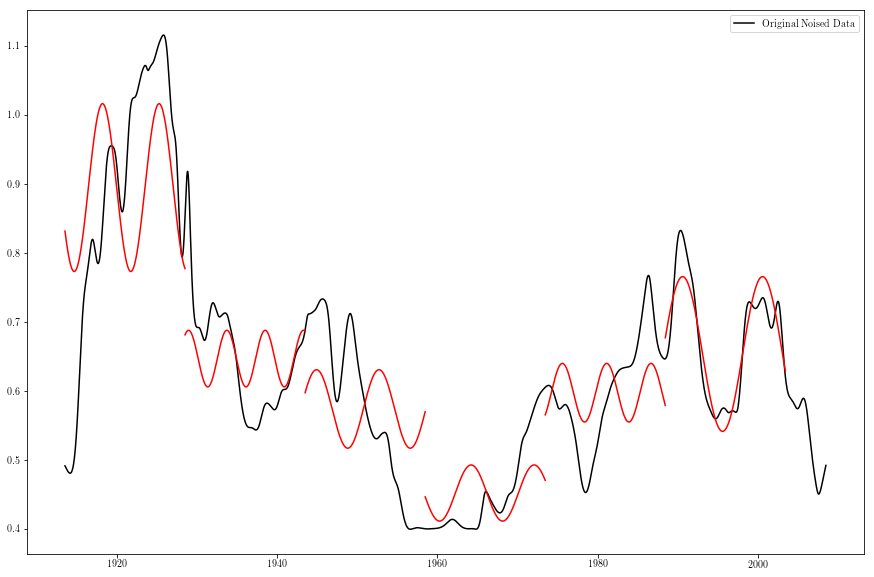

In [23]:
a_s=[]
w_s=[]
c_s=[]
phi_s=[]

plt.figure(figsize=(15,10))
plt.plot(t, k0, 'k-', label="Original Noised Data")
for i in range(6):
    popt, pcov = curve_fit(func, t[365*15*i:365*15*(i+1)], k0[365*15*i:365*15*(i+1)], maxfev=100000)
    plt.plot(t[365*15*i:365*15*(i+1)], func(t[365*15*i:365*15*(i+1)], *popt), 'r-')
    a_s.append(popt[0])
    w_s.append(popt[1])
    c_s.append(popt[2])
    phi_s.append(popt[3])
plt.legend()
plt.show()

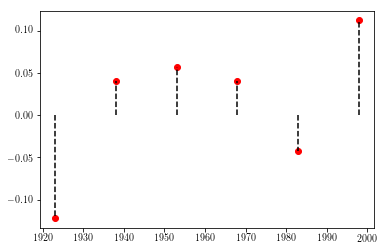

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in log


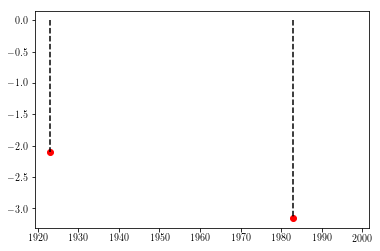

In [30]:
t2=15*np.linspace(1, 6, 6)+1908
#plt.figure(figsize=(15,10))
#plt.ylim(-.5, .5)
plt.plot(t2, a_s, 'ro')
for i in range(6):
    plt.plot((t2[i], t2[i]), (0, a_s[i]), 'k--')
plt.show()

plt.figure()
plt.plot(t2, np.log(-np.array(a_s)), 'ro')
for i in range(6):
    plt.plot((t2[i], t2[i]), (0, np.log(-np.array(a_s)[i])), 'k--')
plt.show()


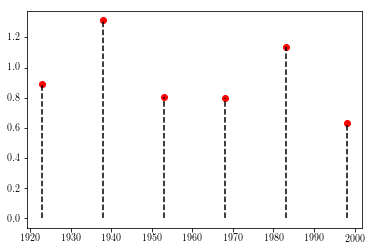

In [31]:
#plt.figure(figsize=(15,10))
plt.plot(t2, w_s, 'ro')
for i in range(6):
    plt.plot((t2[i], t2[i]), (0, w_s[i]), 'k--')
plt.show()

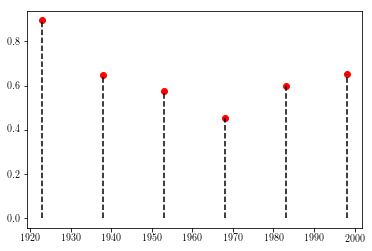

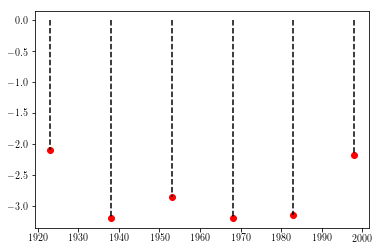

In [32]:
#plt.figure(figsize=(15,10))
plt.plot(t2, c_s, 'ro')
for i in range(6):
    plt.plot((t2[i], t2[i]), (0, c_s[i]), 'k--')
plt.show()

plt.figure()
plt.plot(t2, np.log(np.abs(np.array(a_s))), 'ro')
for i in range(6):
    plt.plot((t2[i], t2[i]), (0, np.log(np.abs(np.array(a_s)[i]))), 'k--')
plt.show()


In [33]:
np.where(np.log(np.abs(np.array(a_s)))>0)

(array([], dtype=int64),)

In [34]:
N_grid=t.shape[0]
p=365*11+2
h=t[1]-t[0]

dw=0.2

st=int(p/2)
fn=N_grid-1-st

theta=np.array(theta)

T=11
W=2*np.pi/T

x0=np.sin(W*t)
y0=np.sin(W*t+theta)

C_0=[0]*N_grid

for i in range(N_grid):
    if (i-p/2>=0) and (i+p/2<=N_grid):
        C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan
        
phi0=np.arccos(C_0)

k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

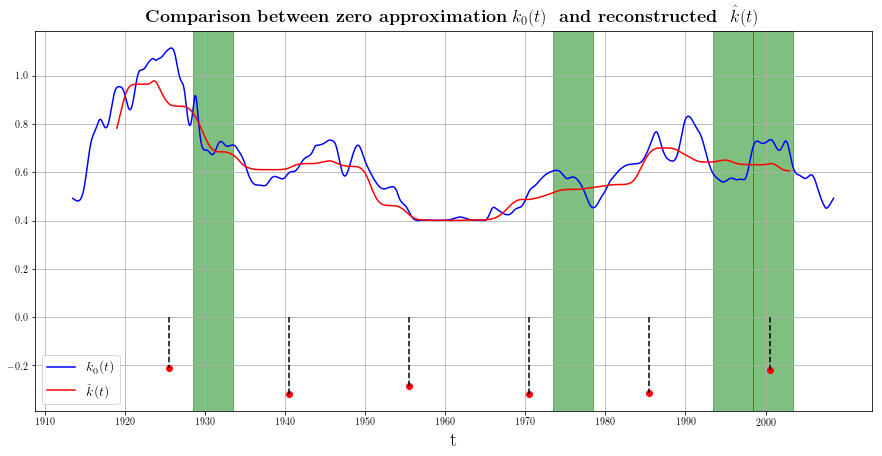

In [35]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))

plt.plot(t, k0, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
#plt.gca().xaxis.set_ticklabels([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000])
#plt.fill_between(t, t[365*5*3], t[365*5*3], facecolor='red', alpha=0.5)
plt.axvspan(t[365*5*3], t[365*5*4], alpha=0.5, color='green')
plt.axvspan(t[365*5*12], t[365*5*13], alpha=0.5, color='green')
plt.axvspan(t[365*5*16], t[365*5*17], alpha=0.5, color='green')
plt.axvspan(t[365*5*17], t[365*5*18], alpha=0.5, color='green')




plt.plot(t2+5/2, np.log(np.abs(np.array(a_s)))/10, 'ro')
for i in range(6):
    plt.plot((t2[i]+5/2, t2[i]+5/2), (0, np.log(np.abs(np.array(a_s)[i]))/10), 'k--')
plt.grid(True)
plt.xticks(np.arange(1910, max(t)+1, 10.0))
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()

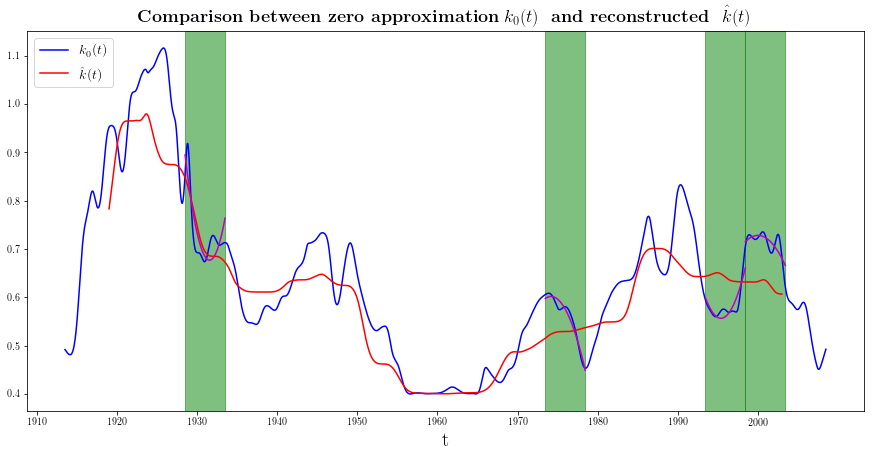

In [283]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))

plt.plot(t, k0, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
#plt.gca().xaxis.set_ticklabels([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000])
#plt.fill_between(t, t[365*5*3], t[365*5*3], facecolor='red', alpha=0.5)
plt.axvspan(t[365*5*3], t[365*5*4], alpha=0.5, color='green')
plt.axvspan(t[365*5*12], t[365*5*13], alpha=0.5, color='green')
plt.axvspan(t[365*5*16], t[365*5*17], alpha=0.5, color='green')
plt.axvspan(t[365*5*17], t[365*5*18], alpha=0.5, color='green')

popt, pcov = curve_fit(func, t[365*5*3:365*5*(3+1)], k0[365*5*3:365*5*(3+1)], maxfev=100000)
plt.plot(t[365*5*3:365*5*(3+1)], func(t[365*5*3:365*5*(3+1)], *popt), 'm-')
popt, pcov = curve_fit(func, t[365*5*12:365*5*(12+1)], k0[365*5*12:365*5*(12+1)], maxfev=100000)
plt.plot(t[365*5*12:365*5*(12+1)], func(t[365*5*12:365*5*(12+1)], *popt), 'm-')
popt, pcov = curve_fit(func, t[365*5*16:365*5*(16+1)], k0[365*5*16:365*5*(16+1)], maxfev=100000)
plt.plot(t[365*5*16:365*5*(16+1)], func(t[365*5*16:365*5*(16+1)], *popt), 'm-')
popt, pcov = curve_fit(func, t[365*5*17:365*5*(17+1)], k0[365*5*17:365*5*(17+1)], maxfev=100000)
plt.plot(t[365*5*17:365*5*(17+1)], func(t[365*5*17:365*5*(17+1)], *popt), 'm-')

plt.xticks(np.arange(1910, max(t)+1, 10.0))
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()

In [208]:
q_t_ar=[]
st=st+1

for i in range(fn-p-st):
    mk=np.array([np.mean(k0[st+i:st+i+p-1])]*p)
    sk=(sum(np.multiply(k0[st+i:st+i+p-1], k0[st+i:st+i+p-1])*h))
    q_t_ar.append((sum(np.multiply(k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1], k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1])*h))/sk)
    
qt=max(q_t_ar)

qt

0.018884182123542623

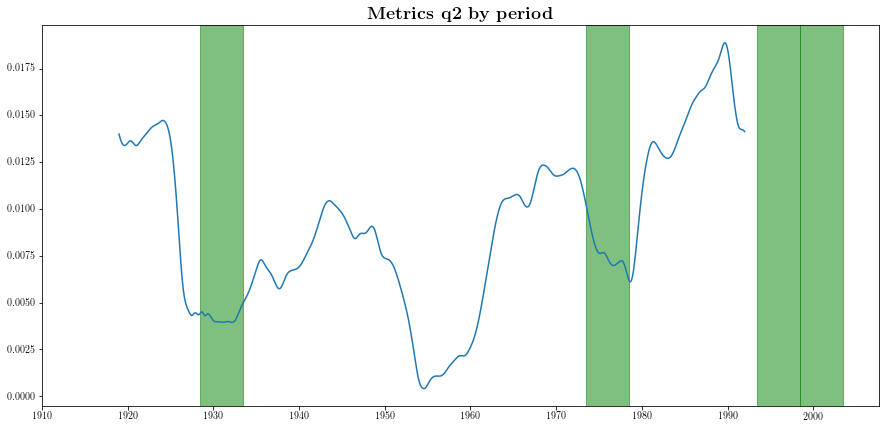

In [225]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t[st:fn-p], q_t_ar)

plt.axvspan(t[365*5*3], t[365*5*4], alpha=0.5, color='green')
plt.axvspan(t[365*5*12], t[365*5*13], alpha=0.5, color='green')
plt.axvspan(t[365*5*16], t[365*5*17], alpha=0.5, color='green')
plt.axvspan(t[365*5*17], t[365*5*18], alpha=0.5, color='green')
plt.xticks(np.arange(1910, max(t)+1, 10.0))

plt.title(r'\textbf{Metrics q2 by period}', fontsize=18)
plt.show()

In [226]:
q_t_ar=[]
p=365

for i in range(fn-p-st):
    mk=np.array([np.mean(k0[st+i:st+i+p-1])]*p)
    sk=(sum(np.multiply(k0[st+i:st+i+p-1], k0[st+i:st+i+p-1])*h))
    q_t_ar.append((sum(np.multiply(k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1], k_hat[st+i:st+i+p-1]-k0[st+i:st+i+p-1])*h))/sk)
    
qt=max(q_t_ar)

qt

0.042594760599438029

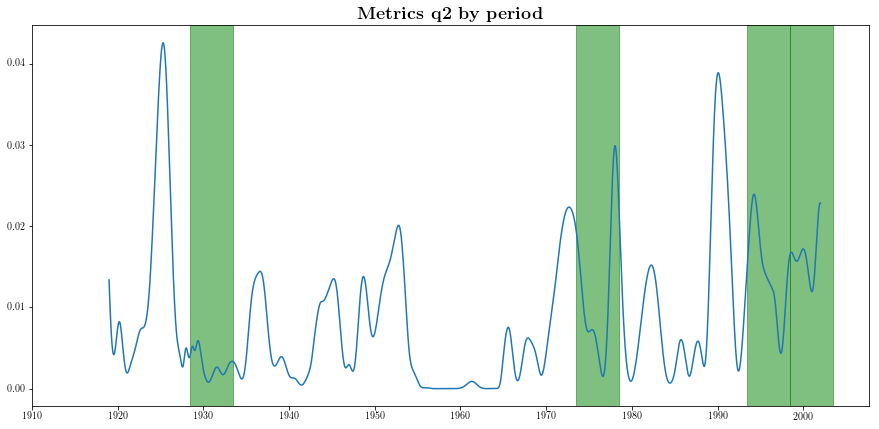

In [227]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t[st:fn-p], q_t_ar)

plt.axvspan(t[365*5*3], t[365*5*4], alpha=0.5, color='green')
plt.axvspan(t[365*5*12], t[365*5*13], alpha=0.5, color='green')
plt.axvspan(t[365*5*16], t[365*5*17], alpha=0.5, color='green')
plt.axvspan(t[365*5*17], t[365*5*18], alpha=0.5, color='green')
plt.xticks(np.arange(1910, max(t)+1, 10.0))

plt.title(r'\textbf{Metrics q2 by period}', fontsize=18)
plt.show()

In [229]:
a_s=np.array(a_s)
w_s=np.array(w_s)
c_s=np.array(c_s)
phi_s=np.array(phi_s)

0 nan nan


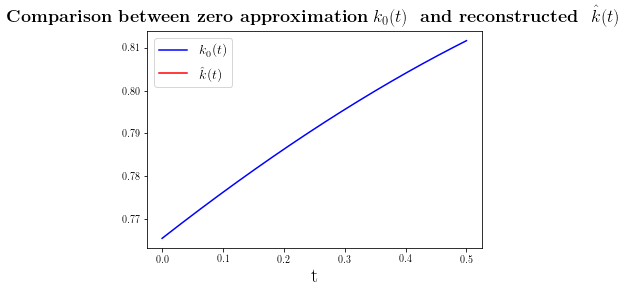

1 nan nan


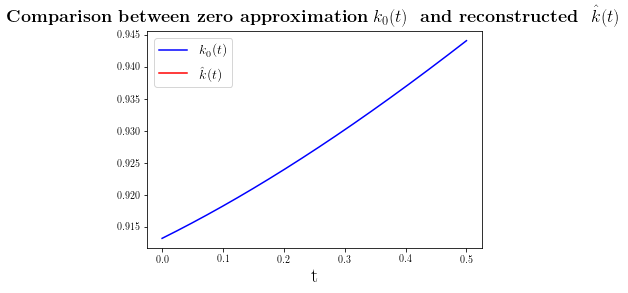

2 nan nan


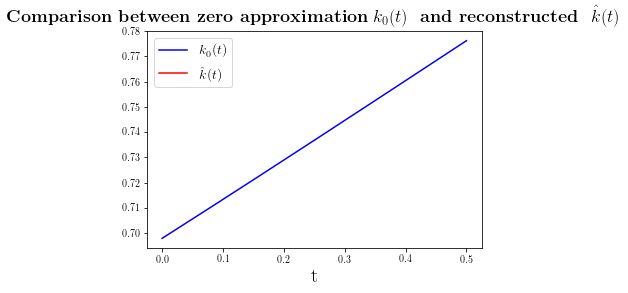

3 nan nan


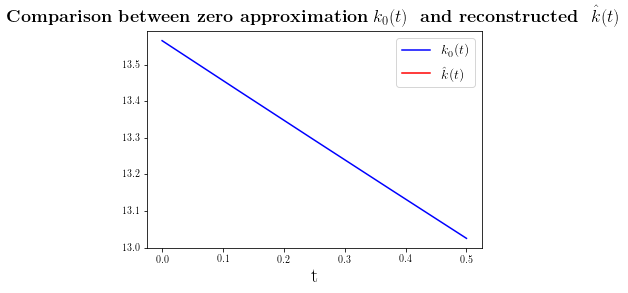

4 nan nan


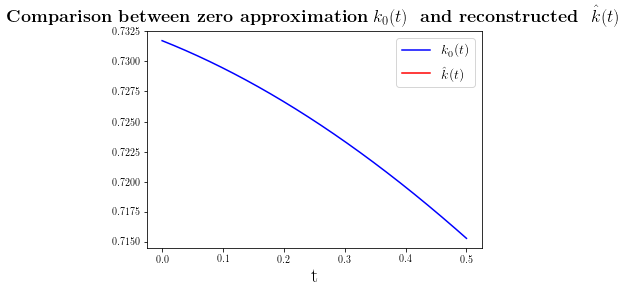

5 nan nan


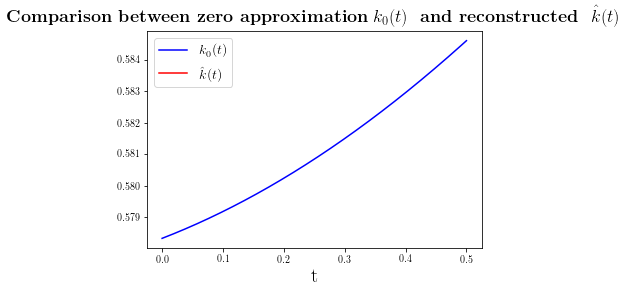

6 nan nan


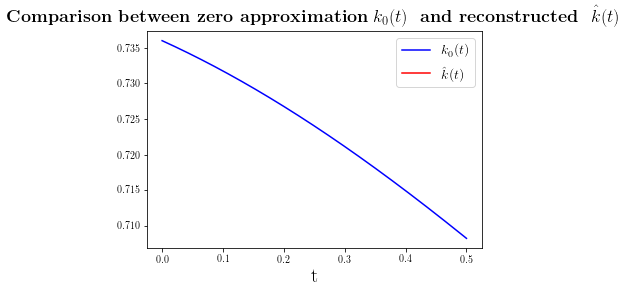

7 nan nan


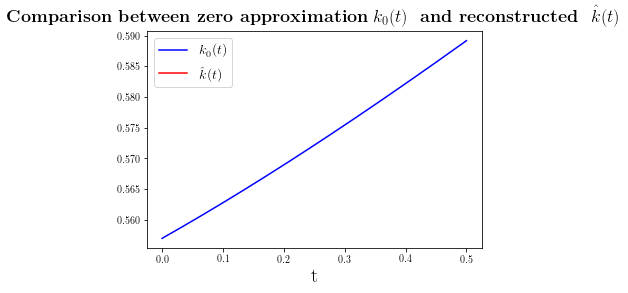

8 nan nan


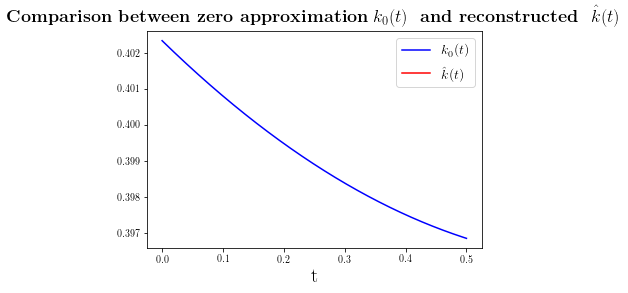

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in arcsin


9
9 nan nan


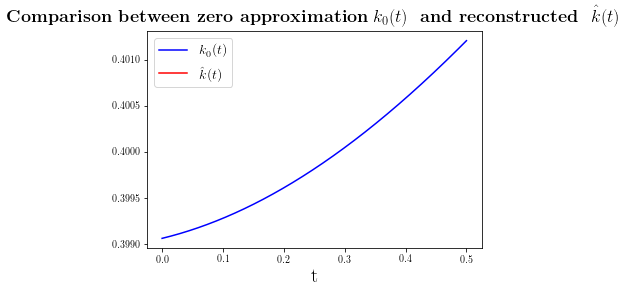

10 nan nan


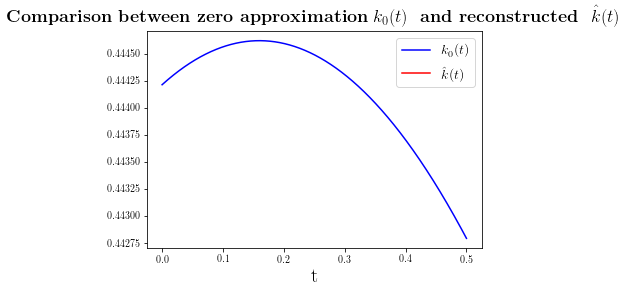

11 nan nan


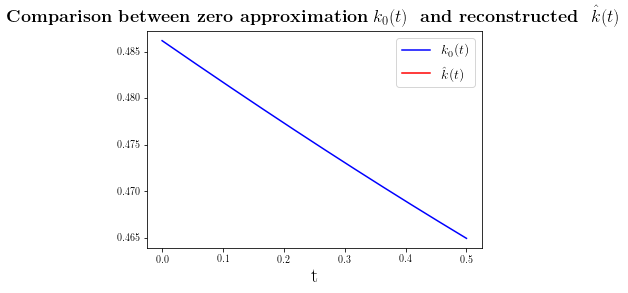

12 nan nan


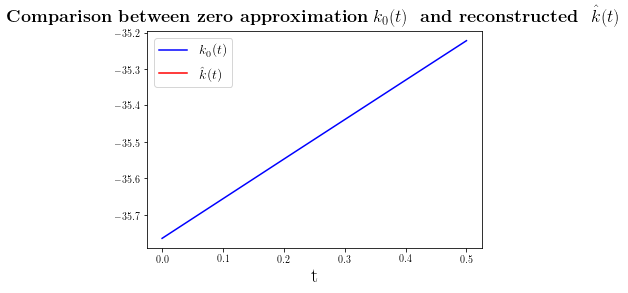

13 nan nan


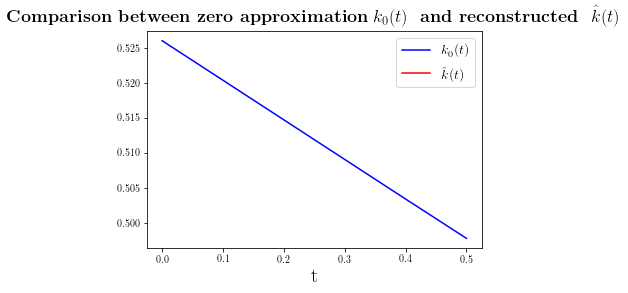

14 nan nan


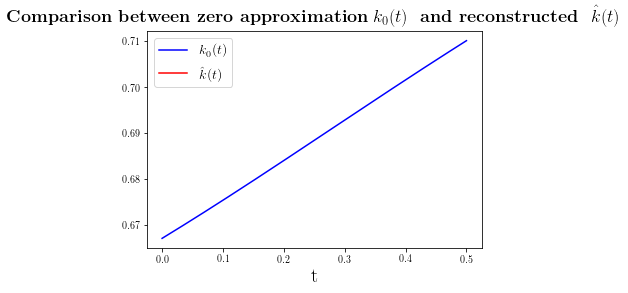

15 nan nan


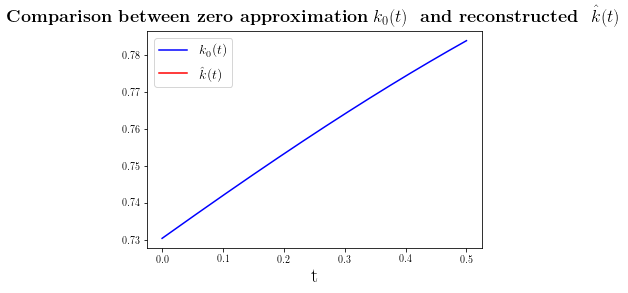

16 nan nan


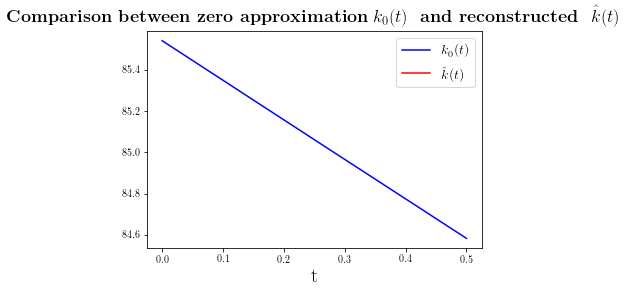

17 nan nan


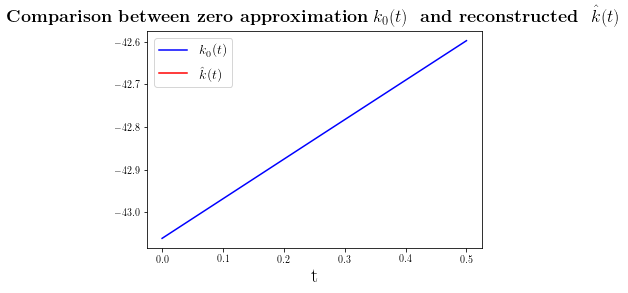

18 nan nan


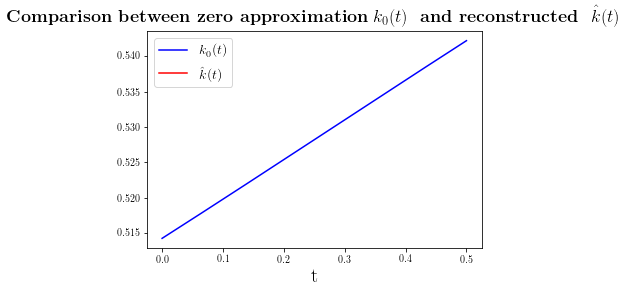

In [295]:
N_grid_sub=5*365
t3=np.linspace(0,0.5,N_grid_sub)
h=t3[1]-t3[0]
p=365*11+2
W=2*np.pi
T=1
L=0.5

q_s=[]
q2_s=[]

for i in range(19):
    A=a_s[i]
    B=w_s[i]
    phi=phi_s[i]
    m=c_s[i]
    k0_s=A*np.sin(B*t3+np.array([phi]*N_grid_sub))+np.array([m]*N_grid_sub)
    k0_f=interpolate.interp1d(t3, k0_s, bounds_error=False, fill_value="extrapolate")
    f=lambda t, x: 2*dw-k0_f(t)*sin(x)
    init=np.arcsin(2*dw/k0_s[0])
    if abs(2*dw/k0_s[0])>1:
        print(i)
    theta_s=[0]*N_grid_sub
    for ii in range(N_grid_sub):
        if i==0:
            theta_s[ii]=init
        else:
            k1=f(t3[ii-1], theta_s[ii-1])*h
            k2=f(t3[ii-1]+h/2, theta_s[ii-1]+k1/2)*h
            k3=f(t3[ii-1]+h/2, theta_s[ii-1]+k2/2)*h
            k4=f(t3[ii-1]+h, theta_s[ii-1]+k3)*h

            theta_s[ii]=theta_s[ii-1]+(k1+2*k2+2*k3+k4)/6
        
    theta_s=np.array(theta_s)
    x0_s=np.sin(W*t3)
    y0_s=np.sin(W*t3+theta_s)
    C_0_s=[0]*N_grid_sub

    for ii in range(N_grid_sub):
        if (t3[ii]-T/2>=0) and (t3[ii]+T/2<=L):
            C_0_s[ii]=np.corrcoef(x0_s[ii-int(p/2):ii+int(p/2)], y0_s[ii-int(p/2):ii+int(p/2)])[0][1]
        else:
            C_0_s[ii]=nan
    
    st=183
    fn=1641
    phi0_s=np.arccos(C_0_s)
    k_hat_s=np.divide(np.array([2*dw]*N_grid_sub), np.sin(phi0_s))
    mk=np.array([np.mean(k0_s[st:fn])]*(fn-st))
    sk=(sum(np.multiply(k0_s[st:fn]-mk, k0_s[st:fn]-mk)*h))
    q=(sum(np.multiply(k_hat_s[st:fn]-k0_s[st:fn], k_hat_s[st:fn]-k0_s[st:fn])*h))/sk
    sk2=(sum(np.multiply(k0_s[st:fn], k0_s[st:fn])*h))
    q2=(sum(np.multiply(k_hat_s[st:fn]-k0_s[st:fn], k_hat_s[st:fn]-k0_s[st:fn])*h))/sk2
    q_s.append(q)
    q2_s.append(q2)
    print(i, q, q2)
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #plt.figure(figsize=(7, 5))
    plt.plot(t3, k0_s, 'b')
    plt.plot(t3, k_hat_s, 'r')
    plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
    plt.xlabel(r't', fontsize=20)
    plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
    plt.show()

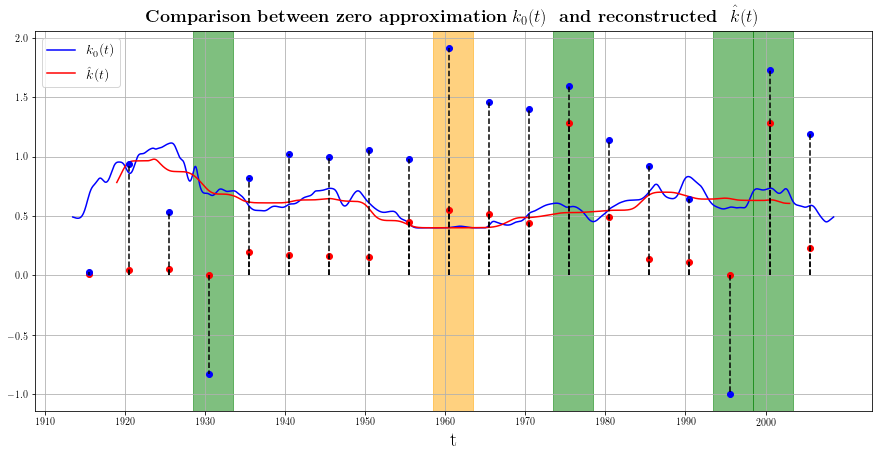

In [293]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))

plt.plot(t, k0, 'b')
plt.plot(t, k_hat, 'r')
plt.legend([r'$k_0(t)$', r'$\hat{k}(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
#plt.gca().xaxis.set_ticklabels([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000])
#plt.fill_between(t, t[365*5*3], t[365*5*3], facecolor='red', alpha=0.5)
plt.axvspan(t[365*5*3], t[365*5*4], alpha=0.5, color='green')
plt.axvspan(t[365*5*12], t[365*5*13], alpha=0.5, color='green')
plt.axvspan(t[365*5*16], t[365*5*17], alpha=0.5, color='green')
plt.axvspan(t[365*5*17], t[365*5*18], alpha=0.5, color='green')
plt.axvspan(t[365*5*9], t[365*5*10], alpha=0.5, color='orange')



plt.plot(t2+5/2, np.array(q2_s)/3, 'ro')
for i in range(19):
    plt.plot((t2[i]+5/2, t2[i]+5/2), (0, np.array(q2_s)[i]/3), 'k--')
    
plt.plot(t2+5/2, np.log(np.array(q_s))/5, 'bo')
for i in range(19):
    plt.plot((t2[i]+5/2, t2[i]+5/2), (0, np.log(np.array(q_s)[i])/5), 'k--')

plt.grid(True)
plt.xticks(np.arange(1910, max(t)+1, 10.0))
plt.title(r'\textbf{Comparison between zero approximation} $k_0(t)$ \textbf{ and reconstructed } $\hat{k}(t)$', fontsize=18)
plt.show()